In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from haversine import haversine, Unit
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
import pickle


In [2]:
df = pd.read_csv("/workspaces/Emiliano0041-IntroML/data/raw/bank-marketing-campaign-data.csv", sep=';')
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


- Investigamos sobre el data set con el que trabajaremos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
(df == "unknown").sum()



age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

- Eliminamos datos irrelevantes para el estudio

In [5]:
df.drop(["day_of_week", "month", "pdays", "nr.employed"], axis=1, inplace=True)

df

,age,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,334,1,0,nonexistent,-1.1,94.767,-50.8,1.028,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,no
41185,56,retired,married,university.degree,no,yes,no,cellular,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,no
41186,44,technician,married,professional.course,no,no,no,cellular,442,1,0,nonexistent,-1.1,94.767,-50.8,1.028,yes


- Cambiamos los valores de los strings "unknown" a los valores de la moda en los casos de columnas categoricas y a la media en los casos de las columnas numericas.

In [6]:
df = df.replace("unknown", np.nan)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)


(df == "unknown").sum()


/tmp/ipykernel_517/1893161898.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipykernel_517/1893161898.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
duration          0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
y                 0
dtype: int64

In [7]:
df.describe()


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,0.172963,0.081886,93.575664,-40.502600,3.621291
std,10.42125,259.279249,2.770014,0.494901,1.570960,0.578840,4.628198,1.734447
min,17.00000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000
25%,32.00000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000
50%,38.00000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.00000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000
max,98.00000,4918.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000


- Con factorize creamos nuevas columnas numericas con los valores de las categoricas

In [18]:
df["job_n"] = pd.factorize(df["job"])[0]
df["marital_n"] = pd.factorize(df["marital"])[0]
df["education_n"] = pd.factorize(df["education"])[0]
df["contact_n"] = pd.factorize(df["contact"])[0]
df["poutcome_n"] = pd.factorize(df["poutcome"])[0]
df["y_n"] = pd.factorize(df["y"])[0]
df["default_n"] = pd.factorize(df["default"])[0]
df["loan_n"] = pd.factorize(df["loan"])[0]
df


,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,euribor3m,y,job_n,marital_n,education_n,contact_n,poutcome_n,y_n,default_n,loan_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,261,1,...,4.857,no,0,0,0,0,0,0,0,0
1,57,services,married,high.school,no,no,no,telephone,149,1,...,4.857,no,1,0,1,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,226,1,...,4.857,no,1,0,1,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,151,1,...,4.857,no,2,0,2,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,307,1,...,4.857,no,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,334,1,...,1.028,yes,5,0,4,1,0,1,0,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,383,1,...,1.028,no,3,0,4,1,0,0,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,189,2,...,1.028,no,5,0,5,1,0,0,0,0
41186,44,technician,married,professional.course,no,no,no,cellular,442,1,...,1.028,yes,4,0,4,1,0,1,0,0


<Axes: >

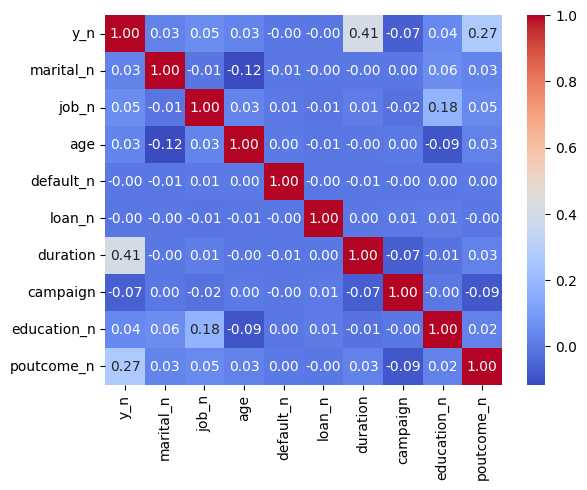

In [19]:
sns.heatmap(df[["y_n", "marital_n", "job_n", "age", "default_n", "loan_n", "duration", "campaign", "education_n", "poutcome_n"]].corr(),
             annot=True, fmt=".2f", cmap="coolwarm")